In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [15]:
df = pd.read_csv('googleplaystore.csv')


In [16]:
print(df.head())

   Unnamed: 0                                                App  \
0           0     Photo Editor & Candy Camera & Grid & ScrapBook   
1           1                                Coloring book moana   
2           2  U Launcher Lite – FREE Live Cool Themes, Hide ...   
3           3                              Sketch - Draw & Paint   
4           4              Pixel Draw - Number Art Coloring Book   

         Category  Rating Reviews  Size     Installs  Type Price  \
0  ART_AND_DESIGN     4.1     159   19M      10,000+  Free     0   
1  ART_AND_DESIGN     3.9     967   14M     500,000+  Free     0   
2  ART_AND_DESIGN     4.7   87510  8.7M   5,000,000+  Free     0   
3  ART_AND_DESIGN     4.5  215644   25M  50,000,000+  Free     0   
4  ART_AND_DESIGN     4.3     967  2.8M     100,000+  Free     0   

  Content Rating                     Genres Last Updated         Current Ver  \
0       Everyone               Art & Design     7-Jan-18               1.0.0   
1       Everyone  Art 

In [17]:
print(df.describe())

         Unnamed: 0       Rating
count  10841.000000  9367.000000
mean    5420.000000     4.193338
std     3129.671468     0.537431
min        0.000000     1.000000
25%     2710.000000     4.000000
50%     5420.000000     4.300000
75%     8130.000000     4.500000
max    10840.000000    19.000000


In [18]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      10841 non-null  int64  
 1   App             10841 non-null  object 
 2   Category        10841 non-null  object 
 3   Rating          9367 non-null   float64
 4   Reviews         10841 non-null  object 
 5   Size            10841 non-null  object 
 6   Installs        10841 non-null  object 
 7   Type            10840 non-null  object 
 8   Price           10841 non-null  object 
 9   Content Rating  10840 non-null  object 
 10  Genres          10841 non-null  object 
 11  Last Updated    10841 non-null  object 
 12  Current Ver     10833 non-null  object 
 13  Android Ver     10838 non-null  object 
dtypes: float64(1), int64(1), object(12)
memory usage: 1.2+ MB
None


In [19]:
print(df.isnull().sum())

Unnamed: 0           0
App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64


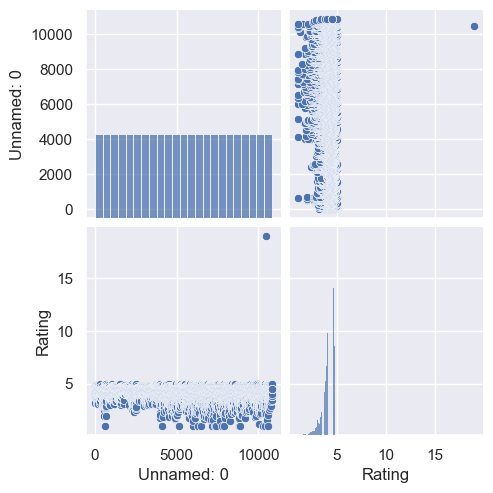

In [20]:
sns.pairplot(df)
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_8588\2291632263.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


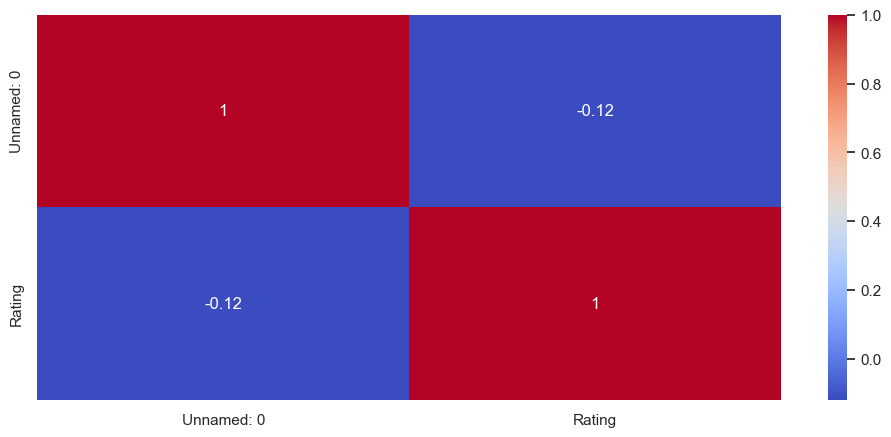

In [21]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

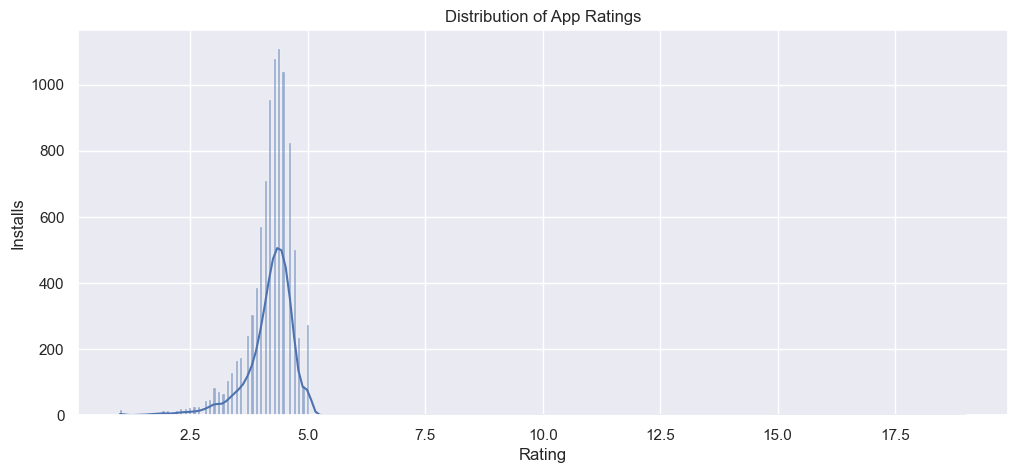

In [22]:
sns.histplot(data=df, x='Rating', kde=True)
plt.title('Distribution of App Ratings')
plt.xlabel('Rating')
plt.ylabel('Installs')
plt.show()

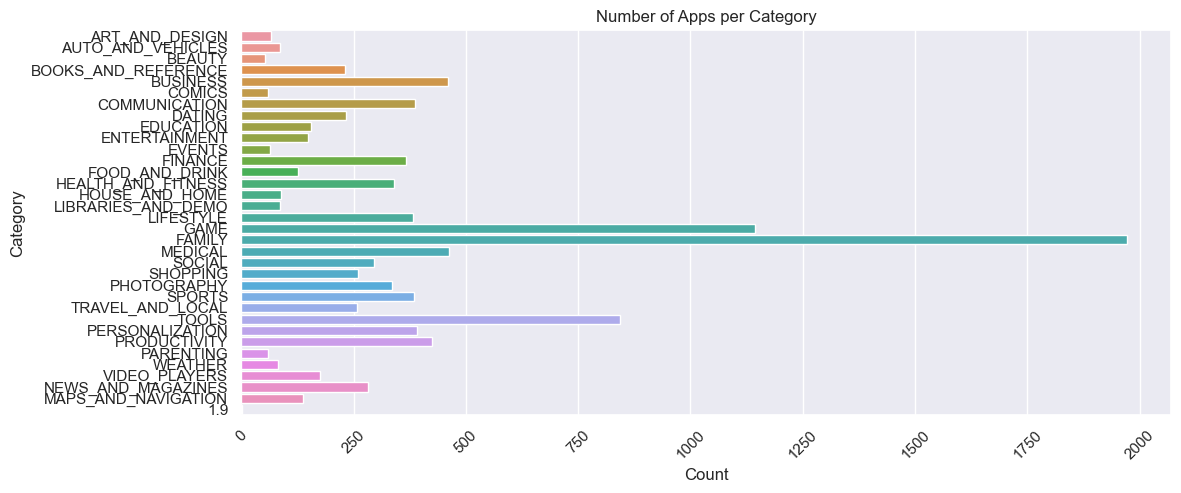

In [23]:
sns.countplot(data=df, y='Category')
plt.title('Number of Apps per Category')
plt.xlabel('Count')
plt.ylabel('Category')
plt.xticks(rotation=45)
plt.show()

In [26]:
df.dropna(inplace=True)

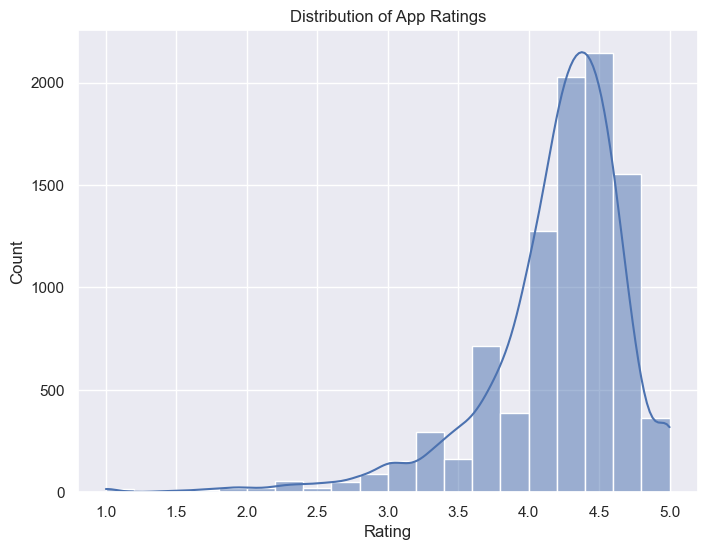

In [28]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Rating'], bins=20, kde=True)
plt.title('Distribution of App Ratings')
plt.show()

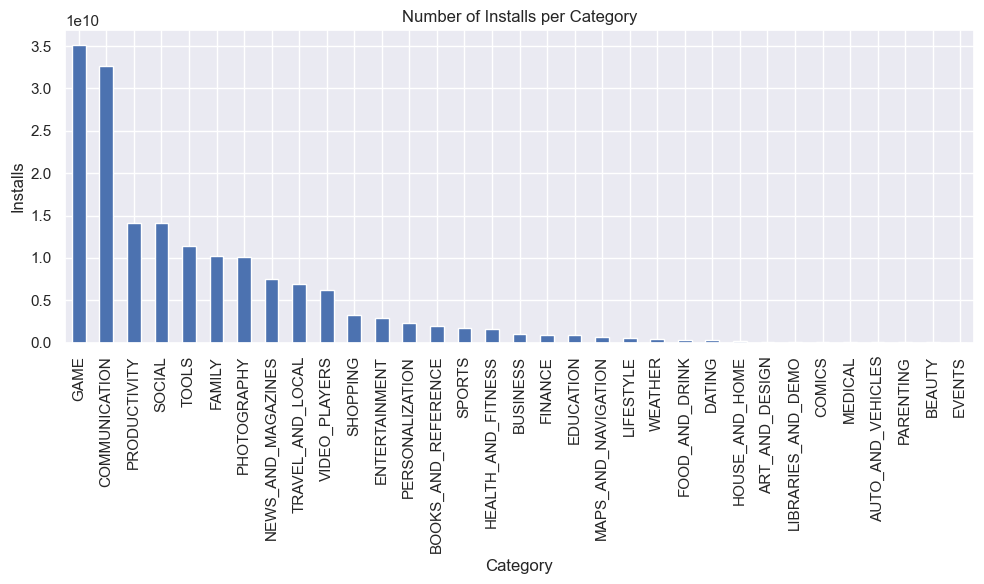

In [29]:
category_installs = df.groupby('Category')['Installs'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
category_installs.plot(kind='bar')
plt.title('Number of Installs per Category')
plt.ylabel('Installs')
plt.xlabel('Category')
plt.xticks(rotation=90)
plt.tight_layout()

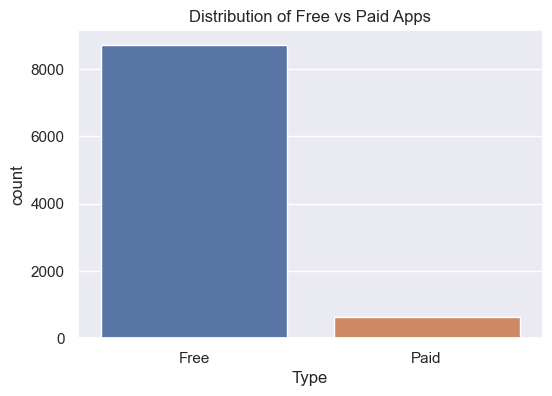

In [30]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Type', data=df)
plt.title('Distribution of Free vs Paid Apps')
plt.show()


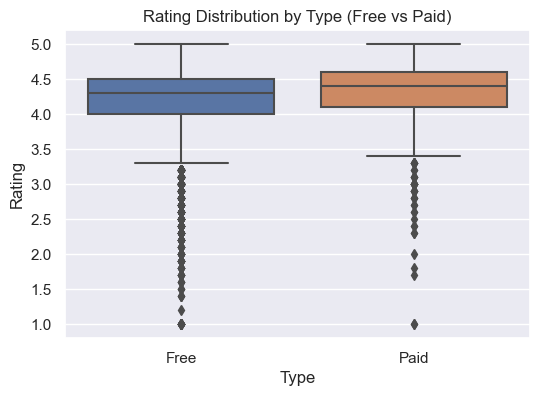

In [31]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='Type', y='Rating', data=df)
plt.title('Rating Distribution by Type (Free vs Paid)')
plt.show()


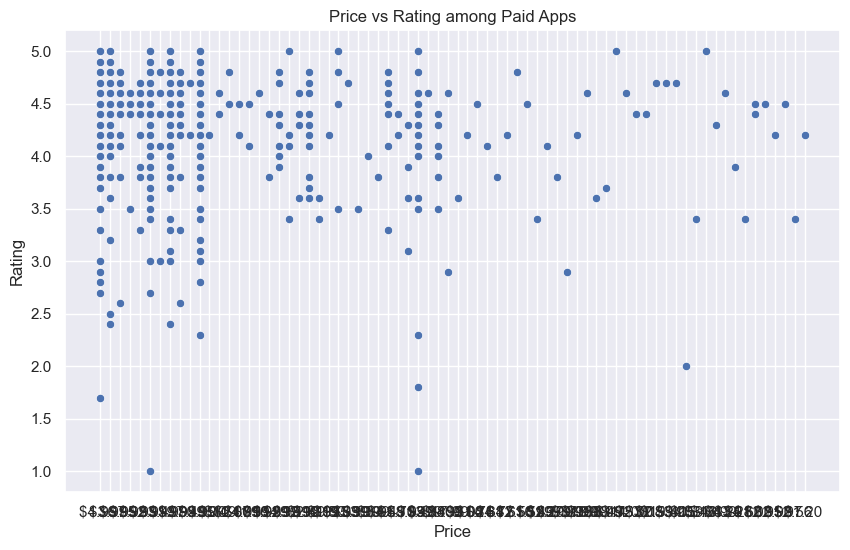

In [32]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Price', y='Rating', data=df[df['Type'] == 'Paid'])
plt.title('Price vs Rating among Paid Apps')
plt.show()